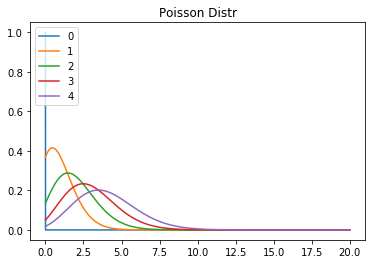

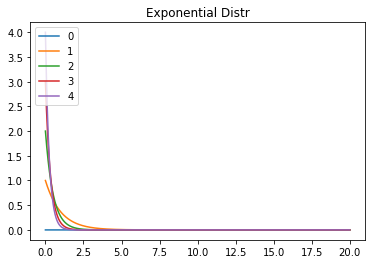

C:\Users\Shuv\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in power


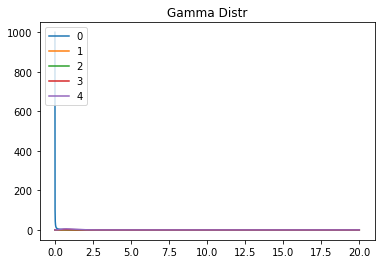

[0.645]

In [4]:
# Showing diff distributions with varying params

import numpy as np,math
import matplotlib.pyplot as plt
from scipy.special import factorial
from random import choices

t = np.arange(0, 20, 0.001)
#u = range(10)

# Poisson distr
for u in range(5):
    d = np.exp(-u)*np.power(u, t)/factorial(t)
    plt.plot(t, d, label = u)
    
#d = np.exp(-u)*np.power(u , t)/factorial(t)
#plt.plot(t, d, 'bs')
plt.legend(loc="upper left")
plt.title(label="Poisson Distr")
plt.show()
#df.to_csv('myDAXdata.csv')

#Exponential distr
for u in range(5):
    d = u*np.exp(-u*t)
    plt.plot(t, d, label = u)
    
#d = np.exp(-u)*np.power(u , t)/factorial(t)
#plt.plot(t, d, 'bs')
plt.legend(loc="upper left")
plt.title(label="Exponential Distr")
plt.show()

# Gamma distribution
for u in range(5):
    alpha = u
    d = math.pow(u,alpha)*np.power(t,alpha-1)*np.exp(-u*t)
    plt.plot(t, d, label = u)

plt.legend(loc="upper left")
plt.title(label="Gamma Distr")
plt.show()
#Generate random number according to a distr(Eg: Exponential)
choices(t,d)

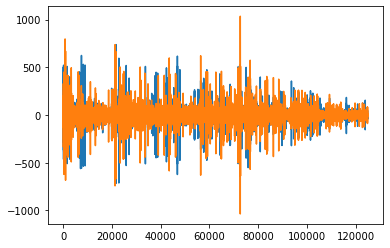

ADF Statistic: -69.494912
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [1]:
# Testing Buy & Sell Order Intensities 
#SP500 ATAS data for 26/06/2020
# Writing first LSTM model
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import math
import sklearn
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,LSTM
 
es260620_df = pd.read_csv("C:\\Users\\Shuv\\Documents\\All Trading\\Market Data\\Research Data\\ES260620TestHawkes.csv")
es260620_df.set_index("Time")
plt.plot(es260620_df['Intensity(Buy)'])
plt.plot(es260620_df['Intensity(Sell)'])
plt.show()


#Start from the 2nd row [1:] to exclude the NaN value
# Do the ADF stationarity test : Shows its not Stationary

result = adfuller(es260620_df['Intensity(Buy)'][1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
    

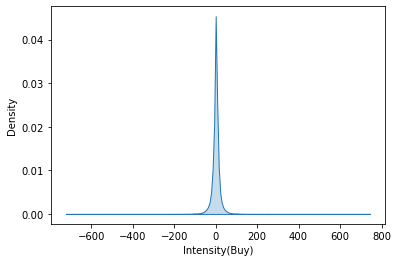

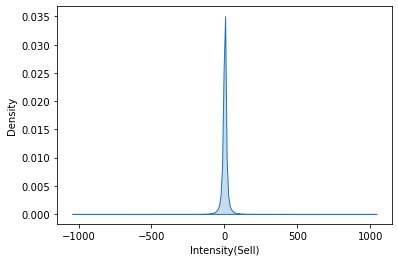

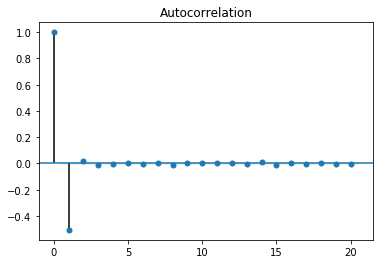

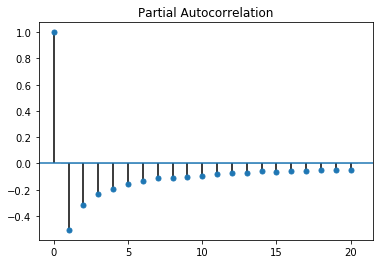

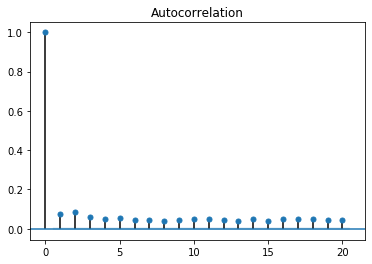

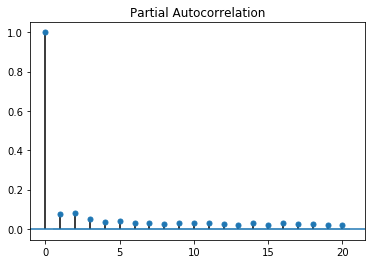

29.176888535212868 28.587449553799807


In [2]:
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# To re-organise the data group by Timestamp (If we want to see volumes at each distinct epochs i.e seconds)
#NOTE : It could be further subdivided into MicroSeconds, but we don't have that granularity yet
es260620_df[es260620_df['Intensity(Buy)']==min(es260620_df['Intensity(Buy)'][1:])]
es260620_df['datetime_df'] = '2020-06-26 '+ es260620_df['Time']
es260620_df['datetime_df']
es260620_df.index = pd.to_datetime(es260620_df['Time'])
es260620_df.index
es260620_df_bysec= es260620_df[['datetime_df','SellVolume','BuyVolume']].groupby('datetime_df').sum().sort_values(by='datetime_df')
#es260620_df_bysec[es260620_df_bysec['datetime_df'] == '2020-06-06 19:59:59']
#Get the max Volume 
es260620_df_bysec
#Plot Intensities and Buy/Sell volume
sns.kdeplot(es260620_df['Intensity(Buy)'].dropna(), shade =True)
plt.show()
sns.kdeplot(es260620_df['Intensity(Sell)'].dropna(), shade =True)
#sns.kdeplot(es260620_df_bysec['SellVolume'].diff().dropna(), shade =True)
#Compute the consecutive difference
#print(es260620_df_bysec['SellVolume'].diff())
#plt.legend(loc="upper left")
plt.show()
#Plot ACF & PACF Autocorrelation , shows significance to lag=1 only [__TO BE ANALYSED__:]
plot_acf(es260620_df['Intensity(Buy)'].dropna(),lags=20)
plot_pacf(es260620_df['Intensity(Buy)'].dropna(),lags=20)

plot_acf(es260620_df['BuyVolume'].dropna(),lags=20)
plot_pacf(es260620_df['BuyVolume'].dropna(),lags=20)

plt.show()

#es260620_df_bysec[es260620_df_bysec['SellVolume']==max(es260620_df_bysec['SellVolume'])]
print(es260620_df_bysec['SellVolume'].mean(),es260620_df_bysec['BuyVolume'].mean())

# Hawkes Process Calibration routine
#Volume distribution exhibits Exponential property (based on Real data Ref:ATAS)
**[TO BE FURTHER ANALYSED] The above ACF & PACF plots of (groupBy)per-sec time Series reveals significance upto only 1 lag





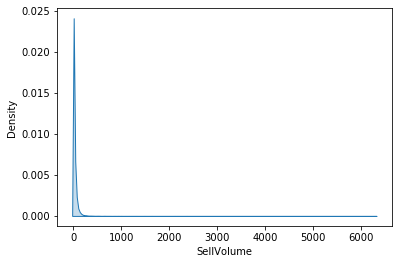

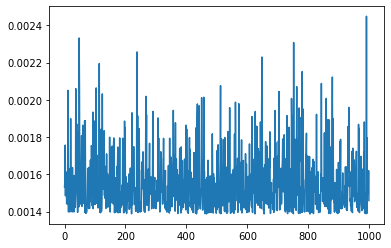

685.3903474164958


In [3]:
import seaborn as sns
from random import *
#plt.hist(es260620_df['SellVolume'].dropna())
#sns.displot(es260620_df['SellVolume'].dropna())
#sns.displot(es260620_df['Intensity(Sell)'].dropna())

# Simulation according to Exponential distr of intensity=inten(lambda)
#Used for simulating the Epochs of a Poisson distr
def simulateexp(inten,prob):
    k = (1 / inten)*np.log(inten / prob)
    #print("within simulateexp %s"% k)
    return k

sns.kdeplot(es260620_df_bysec['SellVolume'].dropna(), shade =True )

#plt.legend(loc="upper left")
plt.show()

es260620_df_bysec['SellVolume']
# Generic Thinning Algo for simulating Hawkes Process (Ref: Limit Order Books pp 131, Algorithm 2)
#i_buy = 0, i_sell = 0 #Initializing 0 events to start with 
#I_max = 0 # sum of Intensities of Buy & sell in Time 0
#T = 1000   # Set a counter for Time
epoch = []
t = np.arange(0, 1000, 1)
#Simulating Uniformization
intensity_max = es260620_df_bysec['SellVolume'].max()

#Generate arrival epochs according to Exp(intensity_max) distr
#intensity_max_exp distr = intensity_max*np.exp(-intensity_max*t)
#choices(t,d)
for t in range(1000):
    epoch.append(simulateexp(intensity_max,random()))
    #choices(1, intensity_max_exp_distr)
#print(len(epoch))    
plt.plot(epoch)
plt.show()
print (1/epoch[len(epoch)-1])

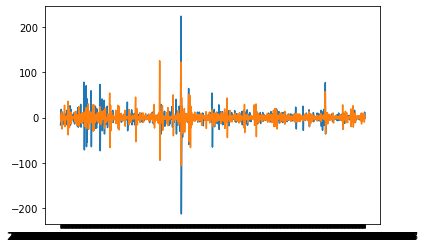

In [8]:
plt.plot(es260620_df_bysec[0:1000].diff())
plt.show()


In [11]:
es260620_df_bysec.head()
for t in range(10):
    print (t)

0
1
2
3
4
5
6
7
8
9


In [6]:
es260620_df_bysec

,SellVolume,BuyVolume
datetime_df,,
2020-06-26 00:00:00,22,7
2020-06-26 00:00:01,6,12
2020-06-26 00:00:02,1,3
2020-06-26 00:00:03,19,7
2020-06-26 00:00:04,27,19
...,...,...
2020-06-26 23:59:55,9,2
2020-06-26 23:59:56,2,11
2020-06-26 23:59:57,17,8
